In [2]:
import labeled_functions
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, log_loss, precision_score, precision_recall_fscore_support, confusion_matrix

In [3]:
X_train_vector , y_train, X_test_vector , y_test = labeled_functions.split_and_vectorize()

Labeled Data loaded.
Data Vectorized


In [4]:
X_train_vector.shape, X_test_vector.shape

((1318, 347), (660, 347))

#### Finding 1:
- One interesting finding is when I use 'linear' for the kernel; changing gamma didn't change both the accuracy and the confusion matrix. <-- BS. It changes them drastically. Fault in coding.

In [5]:
# Question: Why probability is False by default?
svc = SVC(kernel='linear', C=1, gamma=0.2, probability=True) 

# Changing gamma, when kernel is 'linear' doesn't change the accuracy. Neither does it the confusion matrix.
svc.fit(X_train_vector, y_train)
accuracy = svc.score(X_test_vector, y_test)

#Predict Output
preds = svc.predict(X_test_vector)
probs = svc.predict_proba(X_test_vector)

conf_mat = confusion_matrix(preds, y_test)
precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds)
accuracy, conf_mat, precision, recall

(0.7787878787878788, array([[264,  62],
        [ 84, 250]]), array([0.80981595, 0.74850299]), array([0.75862069, 0.80128205]))

In [16]:
preds, probs

(array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 

#### Finding 2:
- Another interesting finding is even if I use 'rbf' for the kernel; changing gamma didn't change the confusion matrix. Although, it changed the accuracy.
- Well the statement above is wrong. I forgot to delete the comment for preds.

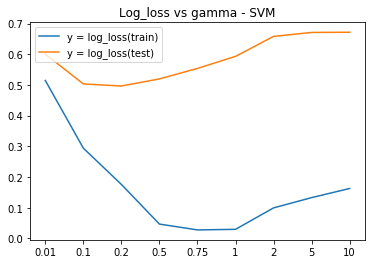

In [13]:
results = []
for gamma in [0.01,0.1,0.2,0.5,0.75,1,2,5,10]:
    svc = SVC(kernel="rbf", C=1, gamma=gamma, probability=True) 
    svc.fit(X_train_vector, y_train)
    accuracy = svc.score(X_test_vector, y_test)
    preds = svc.predict(X_test_vector)
    probs = svc.predict_proba(X_test_vector)
    probs_train = svc.predict_proba(X_train_vector)
    conf_mat = confusion_matrix(preds, y_test)
    results.append((gamma, accuracy, conf_mat, log_loss(y_train, probs_train), log_loss(y_test, probs)))

x = [str(results[x][0]) for x in range(len(results))]
plt.plot(x, [results[x][3] for x in range(len(results))])
plt.plot(x, [results[x][4] for x in range(len(results))])
plt.legend(['y = log_loss(train)', 'y = log_loss(test)'], loc='upper left')
plt.title("Log_loss vs gamma - SVM")
plt.show()

# results

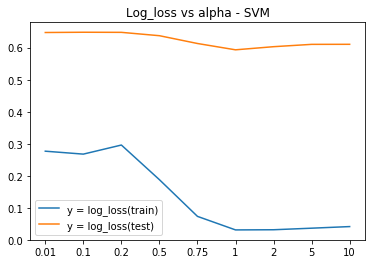

In [15]:
results = []
for alpha in [0.01,0.1,0.2,0.5,0.75,1,2,5,10]:
    svc = SVC(kernel="rbf", C=alpha, gamma=1, probability=True) 
    svc.fit(X_train_vector, y_train)
    accuracy = svc.score(X_test_vector, y_test)
    preds = svc.predict(X_test_vector)
    probs = svc.predict_proba(X_test_vector)
    probs_train = svc.predict_proba(X_train_vector)
    conf_mat = confusion_matrix(preds, y_test)
    results.append((alpha, accuracy, conf_mat, log_loss(y_train, probs_train), log_loss(y_test, probs)))

x = [str(results[x][0]) for x in range(len(results))]
plt.plot(x, [results[x][3] for x in range(len(results))])
plt.plot(x, [results[x][4] for x in range(len(results))])
plt.legend(['y = log_loss(train)', 'y = log_loss(test)'], loc='lower left')
plt.title("Log_loss vs alpha - SVM")
plt.show()
    
# results

In [8]:
# The best accuracy is reached when C=2, gamma=0.1
svc = SVC(kernel="rbf", C=2, gamma=0.1, probability=True) 
svc.fit(X_train_vector, y_train)
accuracy = svc.score(X_test_vector, y_test)
accuracy_train = svc.score(X_train_vector, y_train)
preds = svc.predict(X_test_vector)
probs = svc.predict_proba(X_test_vector)
conf_mat = confusion_matrix(preds, y_test)

precision, recall, fscore, support = precision_recall_fscore_support(y_test, preds)
(accuracy, accuracy_train, conf_mat ,precision, recall)

(0.7954545454545454, 0.9400606980273141, array([[269,  56],
        [ 79, 256]]), array([0.82769231, 0.7641791 ]), array([0.77298851, 0.82051282]))

In [62]:
results = []
for alpha in [0.01,0.1,0.2,0.5,0.75,1,2,5,10]:
    svc = SVC(kernel="sigmoid", C=alpha, gamma=1, probability=True) 
    svc.fit(X_train_vector, y_train)
    accuracy = svc.score(X_test_vector, y_test)
    preds = svc.predict(X_test_vector)
    probs = svc.predict_proba(X_test_vector)
    conf_mat = confusion_matrix(preds, y_test)
    results.append((alpha, accuracy, conf_mat))
results

[(0.01, 0.5272727272727272, array([[348, 312],
         [  0,   0]])), (0.1, 0.706060606060606, array([[265, 111],
         [ 83, 201]])), (0.2, 0.6378787878787879, array([[231, 122],
         [117, 190]])), (0.5, 0.6151515151515151, array([[222, 128],
         [126, 184]])), (0.75, 0.6090909090909091, array([[218, 128],
         [130, 184]])), (1, 0.6106060606060606, array([[218, 127],
         [130, 185]])), (2, 0.5909090909090909, array([[207, 129],
         [141, 183]])), (5, 0.5893939393939394, array([[206, 129],
         [142, 183]])), (10, 0.5863636363636363, array([[203, 128],
         [145, 184]]))]